In [19]:
import pandas as pd

df = pd.read_csv('CEAS_08.csv')
print(df.head())

                                              sender  \
0                   Young Esposito <Young@iworld.de>   
1                       Mok <ipline's1983@icable.ph>   
2  Daily Top 10 <Karmandeep-opengevl@universalnet...   
3                 Michael Parker <ivqrnai@pobox.com>   
4  Gretchen Suggs <externalsep1@loanofficertool.com>   

                                         receiver  \
0                     user4@gvc.ceas-challenge.cc   
1                   user2.2@gvc.ceas-challenge.cc   
2                   user2.9@gvc.ceas-challenge.cc   
3  SpamAssassin Dev <xrh@spamassassin.apache.org>   
4                   user2.2@gvc.ceas-challenge.cc   

                              date  \
0  Tue, 05 Aug 2008 16:31:02 -0700   
1  Tue, 05 Aug 2008 18:31:03 -0500   
2  Tue, 05 Aug 2008 20:28:00 -1200   
3  Tue, 05 Aug 2008 17:31:20 -0600   
4  Tue, 05 Aug 2008 19:31:21 -0400   

                                             subject  \
0                          Never agree to be a loser   
1  

In [20]:
print(df.isnull().sum())

sender        0
receiver    462
date          0
subject      28
body          0
label         0
urls          0
dtype: int64


In [21]:
df = df.dropna()

In [22]:
print(df['label'].value_counts())

1    21827
0    16842
Name: label, dtype: int64


In [23]:
df['body'] = df['body'].str.lower().str.strip()

In [24]:
from sklearn.model_selection import train_test_split

X = df['body']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Save model
with open('CEAS_detector.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save vectorizer
with open('CEAS_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [26]:
y_pred = model.predict(X_test_vec)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9906904577191621

Confusion Matrix:
 [[3339   40]
 [  32 4323]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3379
           1       0.99      0.99      0.99      4355

    accuracy                           0.99      7734
   macro avg       0.99      0.99      0.99      7734
weighted avg       0.99      0.99      0.99      7734



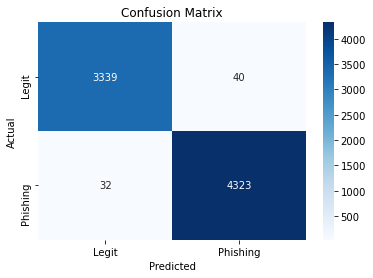

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit', 'Phishing'], yticklabels=['Legit', 'Phishing'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()